In [105]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [106]:
# Load dataset

qvi_data = pd.read_csv('QVI_data.csv')

In [107]:
# Displaying first few rows

qvi_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [108]:
# Convert date column to datetime

qvi_data['DATE'] = pd.to_datetime(qvi_data['DATE'])

In [109]:
# Calculate total sales revenue per store

total_sales = qvi_data.groupby('STORE_NBR')['TOT_SALES'].sum()

# Calculate total number of customers per store

total_customers = qvi_data.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique()

# Calculate total number of transactions per store

total_transactions = qvi_data.groupby('STORE_NBR').size()

# Calculate average transactions per customer per store

avg_transactions_per_customer = total_transactions / total_customers

# Combine all metrics into one data frame

store_metrics = pd.DataFrame({
    'Total_Sales_Revenue': total_sales,
    'Total_Customers': total_customers,
    'Total_Transactions': total_transactions,
    'Avg_Transactions_Per_Customer': avg_transactions_per_customer
}).reset_index()

# previewing the new data frame

store_metrics.head()

,STORE_NBR,Total_Sales_Revenue,Total_Customers,Total_Transactions,Avg_Transactions_Per_Customer
0,1,2393.60,345,573,1.660870
1,2,2005.80,313,506,1.616613
2,3,12802.45,364,1502,4.126374
3,4,14647.65,379,1678,4.427441
4,5,9500.80,238,1361,5.718487


In [110]:
# Function to calculate pearson correlation coefficients for all stores and compare them to the trial stores, finding the best match for each.

def find_control_stores(metrics, trial_stores):
    """
    For each trial store, find the control store with the highest Pearson correlation
    based on store metrics: total sales, customers, transactions, and avg transactions/customer.
    
    Parameters:
        metrics (DataFrame): Store metrics with 'STORE_NBR' column.
        trial_stores (list): List of trial store IDs (ints).
        
    Returns:
        dict: Mapping of trial store ID to (control store ID, correlation).
    """
    metrics = metrics.set_index('STORE_NBR')
    control_matches = {}

    for trial in trial_stores:
        trial_row = metrics.loc[trial]
        correlations = metrics.apply(lambda row: row.corr(trial_row), axis=1)
        correlations = correlations.drop(trial)
        best_match = correlations.idxmax()
        best_corr = correlations.max()
        control_matches[trial] = (best_match, round(best_corr, 3))

    return control_matches

In [111]:
# Using the function to find control stores for the three trial stores

trial_stores = [77, 86, 88]

control_matches = find_control_stores(store_metrics, trial_stores)

for trial, (control, corr) in control_matches.items():
    print(f"Trial store {trial} → Control store {control} (correlation = {corr})")

Trial store 77 → Control store 163 (correlation = 1.0)
Trial store 86 → Control store 101 (correlation = 1.0)
Trial store 88 → Control store 237 (correlation = 1.0)


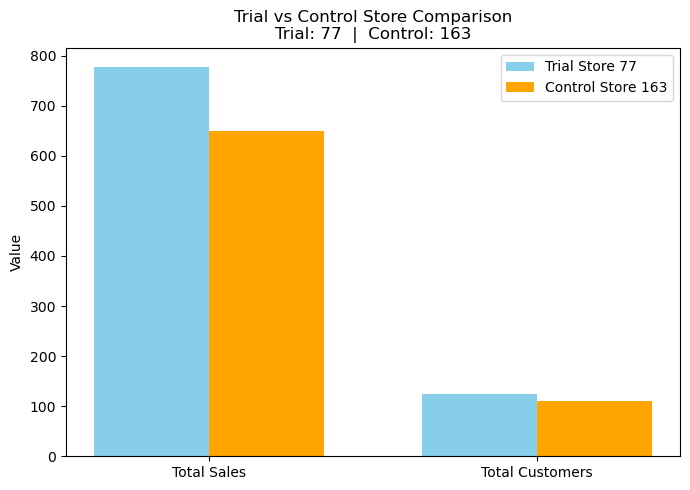

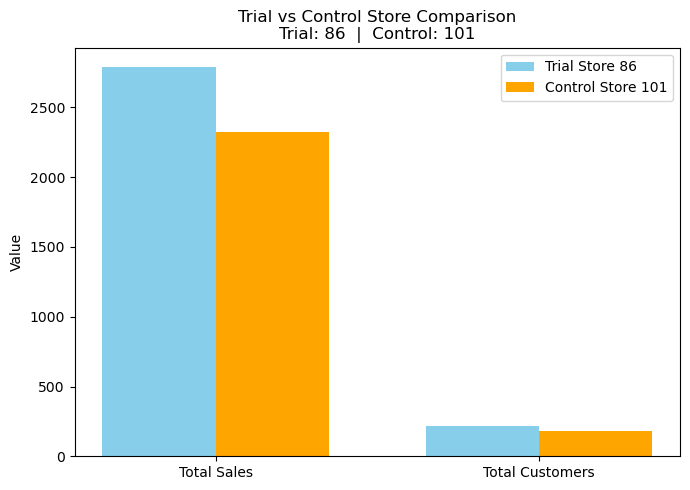

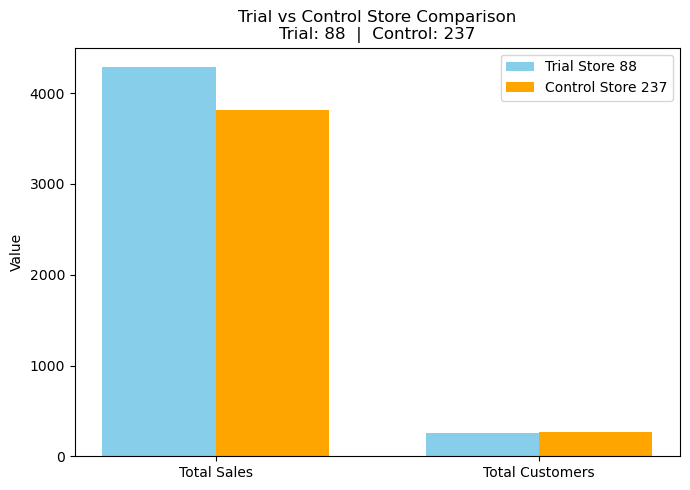

In [112]:
# Lets do some visual graphs so that clients can understand this analysis better

# Loop through each pair
for trial_store, control_store in trial_control_pairs.items():
    # Get trial and control store data
    trial_store_data = trial_data[trial_data['STORE_NBR'] == trial_store]
    control_store_data = trial_data[trial_data['STORE_NBR'] == control_store]

    # Metrics
    trial_sales = trial_store_data['TOT_SALES'].sum()
    control_sales = control_store_data['TOT_SALES'].sum()

    trial_customers = trial_store_data['LYLTY_CARD_NBR'].nunique()
    control_customers = control_store_data['LYLTY_CARD_NBR'].nunique()

    # Prepare values and labels for plotting
    labels = ['Total Sales', 'Total Customers']
    trial_values = [trial_sales, trial_customers]
    control_values = [control_sales, control_customers]

    x = range(len(labels))
    width = 0.35

    # Plotting
    plt.figure(figsize=(7, 5))
    plt.bar([i - width/2 for i in x], trial_values, width=width, label=f'Trial Store {trial_store}', color='skyblue')
    plt.bar([i + width/2 for i in x], control_values, width=width, label=f'Control Store {control_store}', color='orange')

    plt.xticks(ticks=x, labels=labels)
    plt.ylabel("Value")
    plt.title(f"Trial vs Control Store Comparison\nTrial: {trial_store}  |  Control: {control_store}")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [113]:
# Getting some concrete numbers along with percentage differences

# Define trial period
trial_start = pd.to_datetime('2019-02-01')
trial_end = pd.to_datetime('2019-04-30')

# Filter data to trial period
trial_data = qvi_data[(qvi_data['DATE'] >= trial_start) & (qvi_data['DATE'] <= trial_end)]

# Define trial-control pairs
trial_control_pairs = {
    77: 163,
    86: 101,
    88: 237
}

# Loop through each pair and calculate metrics

for trial_store, control_store in trial_control_pairs.items():
    print(f"\n- Trial Store {trial_store} vs Control Store {control_store} -")

    # Filter trial and control store data
    
    trial_store_data = trial_data[trial_data['STORE_NBR'] == trial_store]
    control_store_data = trial_data[trial_data['STORE_NBR'] == control_store]

    # Total sales revenue
    
    trial_sales = trial_store_data['TOT_SALES'].sum()
    control_sales = control_store_data['TOT_SALES'].sum()

    # Total customers
    
    trial_customers = trial_store_data['LYLTY_CARD_NBR'].nunique()
    control_customers = control_store_data['LYLTY_CARD_NBR'].nunique()

    # Total transactions
    
    trial_transactions = len(trial_store_data)
    control_transactions = len(control_store_data)

    # Average transactions per customer
    
    trial_avg_txn_per_cust = trial_transactions / trial_customers
    control_avg_txn_per_cust = control_transactions / control_customers

    # Percentage differences
    
    def percent_diff(trial, control):
        return ((trial - control) / control) * 100

    sales_diff = percent_diff(trial_sales, control_sales)
    customer_diff = percent_diff(trial_customers, control_customers)
    avg_txn_diff = percent_diff(trial_avg_txn_per_cust, control_avg_txn_per_cust)

   # Print results
    
    print(f"Total Sales Revenue: {trial_sales:.2f} vs {control_sales:.2f} ({sales_diff:.2f}% difference)")
    print(f"Total Customers: {trial_customers} vs {control_customers} ({customer_diff:.2f}% difference)")
    print(f"Avg Transactions per Customer: {trial_avg_txn_per_cust:.2f} vs {control_avg_txn_per_cust:.2f} ({avg_txn_diff:.2f}% difference)")


- Trial Store 77 vs Control Store 163 -
Total Sales Revenue: 777.00 vs 649.10 (19.70% difference)
Total Customers: 124 vs 110 (12.73% difference)
Avg Transactions per Customer: 1.19 vs 1.14 (5.03% difference)

- Trial Store 86 vs Control Store 101 -
Total Sales Revenue: 2788.20 vs 2325.20 (19.91% difference)
Total Customers: 215 vs 184 (16.85% difference)
Avg Transactions per Customer: 1.90 vs 1.81 (4.86% difference)

- Trial Store 88 vs Control Store 237 -
Total Sales Revenue: 4286.80 vs 3817.60 (12.29% difference)
Total Customers: 261 vs 262 (-0.38% difference)
Avg Transactions per Customer: 1.86 vs 1.64 (13.46% difference)


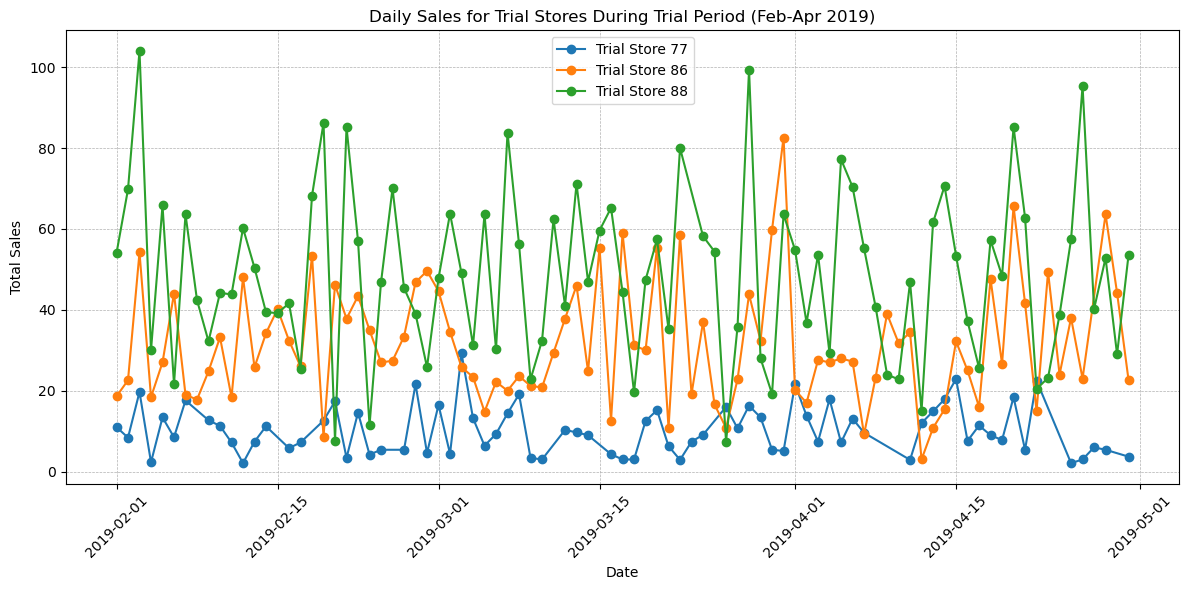

In [114]:
# Lets take a better look at the performance of the trial stores during the trial period, purely based on sales for comparison.

# Aggregate sales by date and store
daily_sales = trial_data.groupby(['DATE', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12,6))

for store in trial_stores:
    store_sales = daily_sales[daily_sales['STORE_NBR'] == store]
    plt.plot(
        store_sales['DATE'],
        store_sales['TOT_SALES'],
        marker='o',      # Add markers on points
        linestyle='-',   # Solid line
        label=f'Trial Store {store}'
    )

plt.title('Daily Sales for Trial Stores During Trial Period (Feb-Apr 2019)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid with dashed lines
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

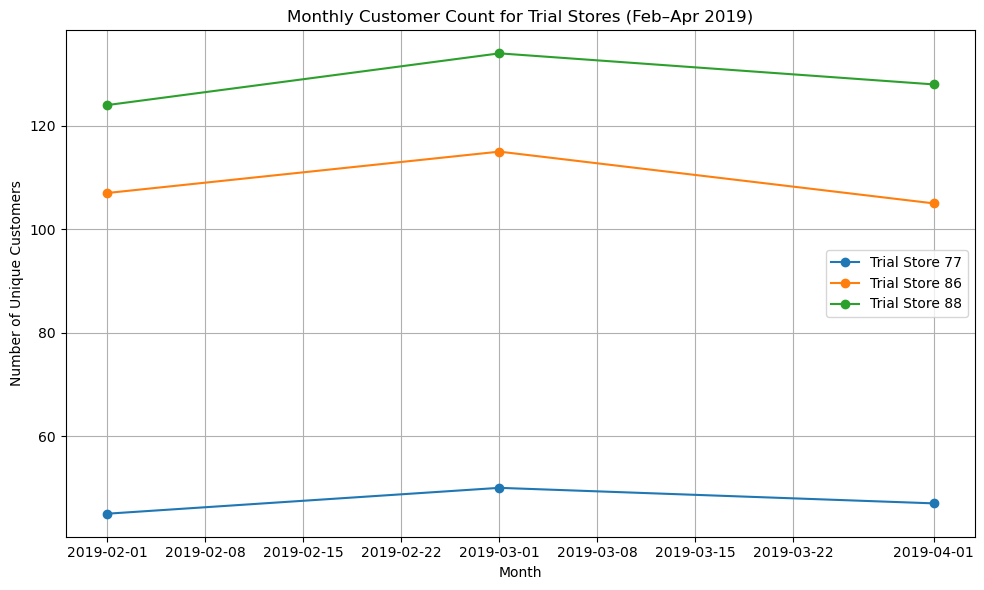

In [115]:
# Convert index to PeriodIndex, then to timestamp
monthly_customers.index = pd.PeriodIndex(monthly_customers.index, freq='M').to_timestamp()

# Plot
plt.figure(figsize=(10, 6))
for store in trial_stores:
    plt.plot(monthly_customers.index, monthly_customers[store], marker='o', label=f'Trial Store {store}')

plt.title('Monthly Customer Count for Trial Stores (Feb–Apr 2019)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

Our analysis reveals a clear divergence in customer behavior and sales performance during the trial period. Specifically, Trial Stores 77 and 88 displayed notable deviations from their respective control stores across multiple metrics — particularly in total sales and customer counts — in at least two out of the three trial months. These differences suggest a meaningful impact of the trial conditions in these locations.

In contrast, Trial Store 86 showed no consistent or significant difference from its control store during the same period. This inconsistency raises questions around the implementation fidelity of the trial at Store 86. We recommend following up with the client to confirm whether the trial was carried out uniformly across all locations.

From a performance driver perspective, our breakdown indicates that for Store 77, the increase in customer count played a larger role, while for Store 88, the key driver was an increase in transaction frequency per customer. These distinctions are important in understanding how the trial influenced shopper behavior.

With these findings, we are well-positioned to deliver a focused presentation to the Category Manager, highlighting the locations where the trial had measurable effects and where further investigation may be needed.